In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from pandas.util import hash_pandas_object

pd.set_option('display.max_columns', None)

In [ ]:
training_data=pd.read_csv("fraudTrain.csv")
testing_data=pd.read_csv("fraudTest.csv")

In [ ]:
def match_dataframe_columns(df_train, df_test):
    try:
        return(all(df_train.columns == df_test.columns))
    except:
        return(False)

In [ ]:
match_dataframe_columns(training_data, testing_data)

True

In [ ]:
fraud_data = pd.concat([training_data, testing_data], ignore_index=False)

In [ ]:
fraud_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [ ]:
fraud_data.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,63453,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1.388534e+09,39.946837,-91.333331,0.0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1.388534e+09,29.661049,-96.186633,0.0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1.388534e+09,46.658340,-119.715054,0.0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1.388534e+09,44.470525,-117.080888,0.0
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,Edmond,OK,73034,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1.388534e+09,36.210097,-97.036372,0.0


In [ ]:
fraud_data.info()
fraud_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1264874 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1264874 non-null  int64  
 1   trans_date_trans_time  1264874 non-null  object 
 2   cc_num                 1264874 non-null  int64  
 3   merchant               1264874 non-null  object 
 4   category               1264874 non-null  object 
 5   amt                    1264874 non-null  float64
 6   first                  1264874 non-null  object 
 7   last                   1264874 non-null  object 
 8   gender                 1264874 non-null  object 
 9   street                 1264874 non-null  object 
 10  city                   1264874 non-null  object 
 11  state                  1264874 non-null  object 
 12  zip                    1264874 non-null  int64  
 13  lat                    1264874 non-null  float64
 14  long               

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.264874e+06,1.264874e+06,1.264874e+06,1.264874e+06,1.264874e+06,1.264874e+06,1.264874e+06,1.264873e+06,1.264873e+06,1.264873e+06,1.264873e+06
mean,3.208712e+05,4.172668e+17,6.989035e+01,4.880877e+04,3.853953e+01,-9.022408e+01,8.870648e+04,1.357460e+09,3.853923e+01,-9.022435e+01,5.016314e-03
std,1.904011e+05,1.309023e+18,1.579157e+02,2.688249e+04,5.068032e+00,1.374443e+01,3.017500e+05,2.151630e+07,5.102356e+00,1.375608e+01,7.064810e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,1.581090e+05,1.800400e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.430000e+02,1.338574e+09,3.474639e+01,-9.689693e+01,0.000000e+00
50%,3.162180e+05,3.520550e+15,4.736000e+01,4.817400e+04,3.937160e+01,-8.747690e+01,2.443000e+03,1.348647e+09,3.937062e+01,-8.743585e+01,0.000000e+00
75%,4.743270e+05,4.642255e+15,8.303000e+01,7.201100e+04,4.189480e+01,-8.015800e+01,2.032800e+04,1.379256e+09,4.195432e+01,-8.023908e+01,0.000000e+00
max,7.091540e+05,4.992346e+18,2.654412e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695203e+01,1.000000e+00


In [ ]:
print(fraud_data.isnull())

        Unnamed: 0  trans_date_trans_time  cc_num  merchant  category    amt  \
0            False                  False   False     False     False  False   
1            False                  False   False     False     False  False   
2            False                  False   False     False     False  False   
3            False                  False   False     False     False  False   
4            False                  False   False     False     False  False   
...            ...                    ...     ...       ...       ...    ...   
555714       False                  False   False     False     False  False   
555715       False                  False   False     False     False  False   
555716       False                  False   False     False     False  False   
555717       False                  False   False     False     False  False   
555718       False                  False   False     False     False  False   

        first   last  gender  street   

In [ ]:
fraud_data.describe()
fraud_data.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
fraud_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
fraud_data['hash_name'] = hash_pandas_object(fraud_data['first'] + ' ' + fraud_data['last'])


transaction_date = pd.to_datetime(fraud_data['trans_date_trans_time'])
birth_date = pd.to_datetime(fraud_data['dob'])


year_timedelta = np.timedelta64(1, 'Y')
fraud_data['age_years'] = (transaction_date - birth_date) / year_timedelta

In [ ]:
fraud_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hash_name,age_years
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0,4904204149027222506,30.815144
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0,3946690872736109954,40.531977
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0,17589267391949273797,56.951205
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0,4670342444137980461,51.970953
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0,8131892023927108686,32.764539


In [ ]:
duplicate_rows_data = fraud_data[fraud_data.duplicated()]
print("Number of duplicated rows: ", duplicate_rows_data.shape)

Number of duplicated rows:  (0, 24)


In [ ]:

fraud_data.drop_duplicates(subset=['first', 'last'], inplace=True)

In [ ]:
print("Number of duplicated rows: ", duplicate_rows_data.shape)

Number of duplicated rows:  (0, 24)


In [ ]:
for column in fraud_data.columns:
    num_distinct_values = len(fraud_data[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

trans_date_trans_time: 951 distinct values
cc_num: 957 distinct values
merchant: 460 distinct values
category: 14 distinct values
amt: 925 distinct values
first: 348 distinct values
last: 480 distinct values
gender: 2 distinct values
street: 957 distinct values
city: 875 distinct values
state: 50 distinct values
zip: 944 distinct values
lat: 942 distinct values
long: 942 distinct values
city_pop: 860 distinct values
job: 491 distinct values
dob: 942 distinct values
trans_num: 957 distinct values
unix_time: 951 distinct values
merch_lat: 957 distinct values
merch_long: 957 distinct values
is_fraud: 2 distinct values
hash_name: 957 distinct values
age_years: 957 distinct values


In [ ]:
fraud_data.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
hash_name                0
age_years                0
dtype: int64

In [ ]:
fraud_data.describe().style.format('{:.2f}')

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,hash_name,age_years
count,957.00,957.00,957.00,957.00,957.00,957.00,957.00,957.00,957.00,957.00,957.00,957.00
mean,425439001000445248.00,81.43,48680.95,38.62,-90.26,98172.64,1326782812.70,38.62,-90.27,0.06,9303596190632867840.00,48.25
std,1316519854129516800.00,129.03,27014.76,5.12,14.12,321348.37,7405343.67,5.15,14.15,0.23,5274203649932662784.00,18.36
min,60416207185.00,1.03,1257.00,20.03,-165.67,23.00,1325376018.00,19.21,-166.15,0.00,10453862225973654.00,13.92
25%,180018375329178.00,12.40,26041.00,34.88,-96.79,800.00,1325389511.00,34.89,-96.70,0.00,4825247139376492544.00,33.01
50%,3521417320836166.00,54.60,47863.00,39.41,-87.46,2872.00,1325411408.00,39.35,-87.41,0.00,9210514235189019648.00,46.99
75%,4651007077623147.00,90.90,71832.00,42.01,-80.16,21902.00,1325443684.00,41.91,-80.08,0.00,13552677009608966144.00,60.31
max,4992346398065154048.00,1433.54,99921.00,66.69,-67.95,2906700.00,1387596548.00,67.06,-68.52,1.00,18435048609283596288.00,94.18


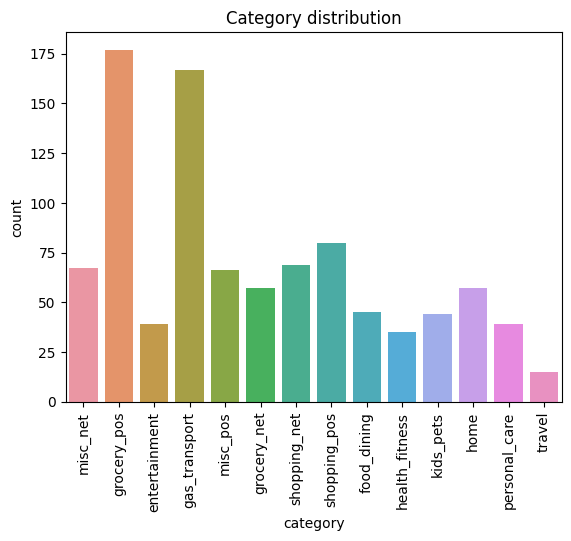

In [ ]:
sns.countplot(x='category', data=fraud_data)
plt.title('Category distribution')
plt.xticks(rotation=90)
plt.show()

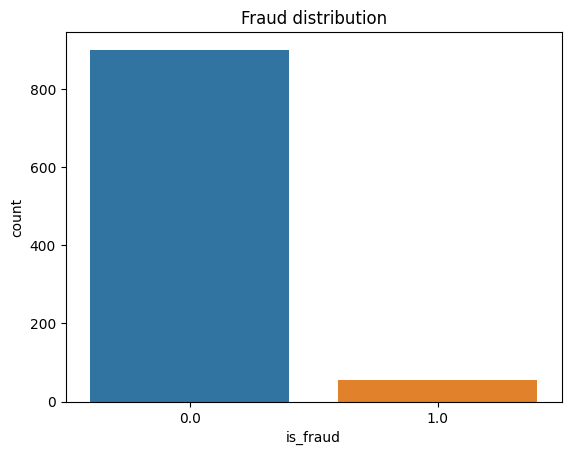

In [ ]:
sns.countplot(x='is_fraud', data=fraud_data)
plt.title('Fraud distribution')
plt.show()

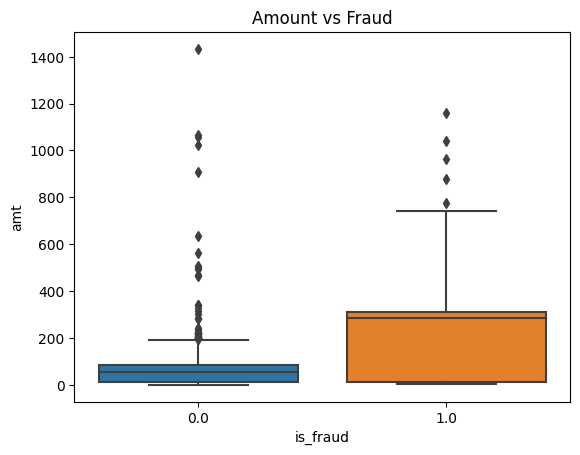

In [ ]:
sns.boxplot(x='is_fraud', y='amt', data=fraud_data)
plt.title("Amount vs Fraud")
plt.show()

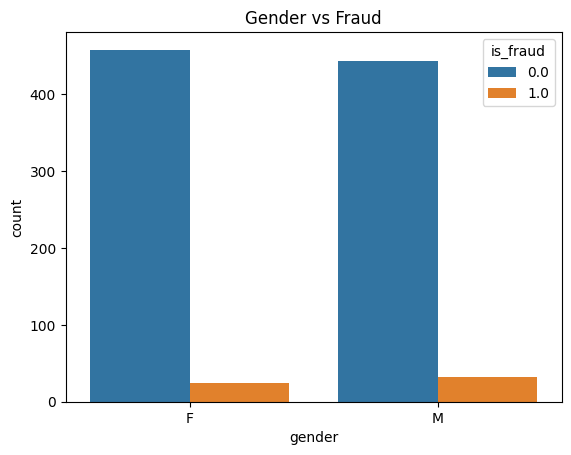

In [ ]:
sns.countplot(x='gender', hue='is_fraud', data=fraud_data)
plt.title("Gender vs Fraud")
plt.show()

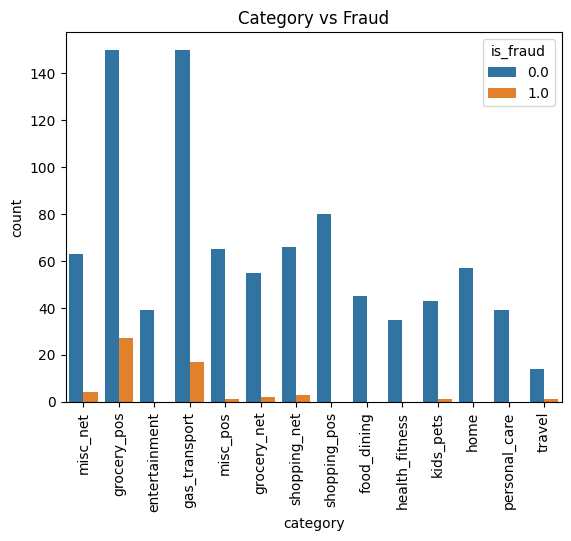

In [ ]:
sns.countplot(x='category', hue='is_fraud', data=fraud_data)
plt.title("Category vs Fraud")
plt.xticks(rotation=90)
plt.show()


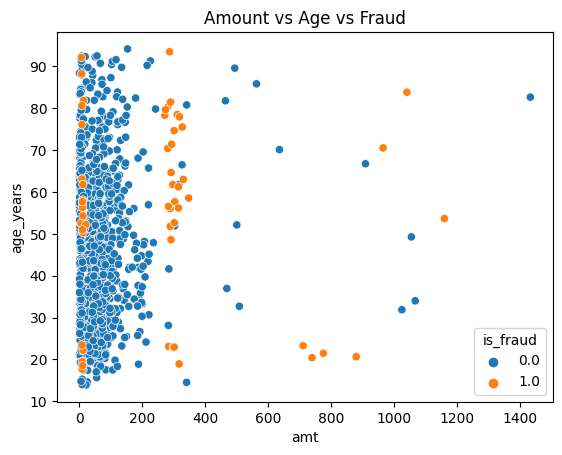

In [ ]:
sns.scatterplot(data=fraud_data, x='amt', y='age_years', hue='is_fraud')
plt.title('Amount vs Age vs Fraud')
plt.show()


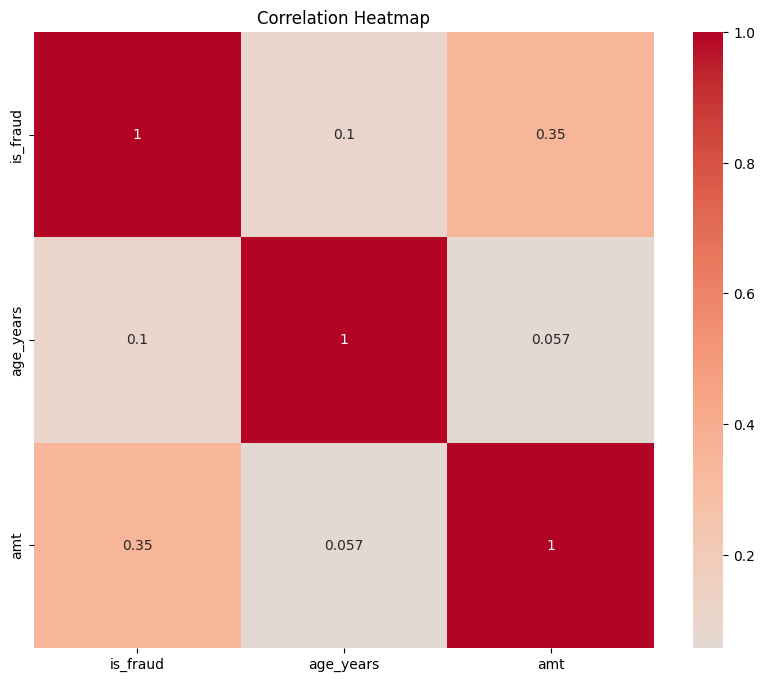

In [ ]:
correlation_matrix = fraud_data[['is_fraud', 'age_years', 'amt']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)


plt.title("Correlation Heatmap")


plt.show()

In [ ]:
fraud_data.dropna(inplace=True)

In [ ]:
fraud_data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,hash_name,age_years
count,9.570000e+02,957.000000,957.000000,957.000000,957.000000,9.570000e+02,9.570000e+02,957.000000,957.000000,957.000000,9.570000e+02,957.000000
mean,4.254390e+17,81.427827,48680.954023,38.622276,-90.260142,9.817264e+04,1.326783e+09,38.617724,-90.270795,0.058516,9.303596e+18,48.247244
std,1.316520e+18,129.033337,27014.755374,5.121638,14.124533,3.213484e+05,7.405344e+06,5.153554,14.151594,0.234840,5.274204e+18,18.355198
min,6.041621e+10,1.030000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.209212,-166.148374,0.000000,1.045386e+16,13.922618
25%,1.800184e+14,12.400000,26041.000000,34.883800,-96.790900,8.000000e+02,1.325390e+09,34.893652,-96.703476,0.000000,4.825247e+18,33.014575
50%,3.521417e+15,54.600000,47863.000000,39.412500,-87.456900,2.872000e+03,1.325411e+09,39.350022,-87.409615,0.000000,9.210514e+18,46.993059
75%,4.651007e+15,90.900000,71832.000000,42.014400,-80.158000,2.190200e+04,1.325444e+09,41.907592,-80.082260,0.000000,1.355268e+19,60.312091
max,4.992346e+18,1433.540000,99921.000000,66.693300,-67.950300,2.906700e+06,1.387597e+09,67.064277,-68.523008,1.000000,1.843505e+19,94.183579


In [ ]:
fraud_data.describe().style.format('{:.2f}')

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,hash_name,age_years
count,957.00,957.00,957.00,957.00,957.00,957.00,957.00,957.00,957.00,957.00,957.00,957.00
mean,425439001000445248.00,81.43,48680.95,38.62,-90.26,98172.64,1326782812.70,38.62,-90.27,0.06,9303596190632867840.00,48.25
std,1316519854129516800.00,129.03,27014.76,5.12,14.12,321348.37,7405343.67,5.15,14.15,0.23,5274203649932662784.00,18.36
min,60416207185.00,1.03,1257.00,20.03,-165.67,23.00,1325376018.00,19.21,-166.15,0.00,10453862225973654.00,13.92
25%,180018375329178.00,12.40,26041.00,34.88,-96.79,800.00,1325389511.00,34.89,-96.70,0.00,4825247139376492544.00,33.01
50%,3521417320836166.00,54.60,47863.00,39.41,-87.46,2872.00,1325411408.00,39.35,-87.41,0.00,9210514235189019648.00,46.99
75%,4651007077623147.00,90.90,71832.00,42.01,-80.16,21902.00,1325443684.00,41.91,-80.08,0.00,13552677009608966144.00,60.31
max,4992346398065154048.00,1433.54,99921.00,66.69,-67.95,2906700.00,1387596548.00,67.06,-68.52,1.00,18435048609283596288.00,94.18


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = fraud_data[['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'age_years']]
y = fraud_data['is_fraud']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(random_state=42, max_iter=1000, solver='lbfgs')

logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.96875
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       180
         1.0       1.00      0.50      0.67        12

    accuracy                           0.97       192
   macro avg       0.98      0.75      0.83       192
weighted avg       0.97      0.97      0.96       192

Confusion Matrix:
 [[180   0]
 [  6   6]]


In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = fraud_data[['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'age_years']]
y = fraud_data['is_fraud']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


svm = SVC(kernel='linear', random_state=42)


svm.fit(X_train_scaled, y_train)


y_pred = svm.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)


print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.9947916666666666
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       180
         1.0       1.00      0.92      0.96        12

    accuracy                           0.99       192
   macro avg       1.00      0.96      0.98       192
weighted avg       0.99      0.99      0.99       192

Confusion Matrix:
 [[180   0]
 [  1  11]]


In [ ]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = fraud_data[['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'age_years']]
y = fraud_data['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       180
         1.0       1.00      1.00      1.00        12

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192

Confusion Matrix:
 [[180   0]
 [  0  12]]
